#Data analysis project
##Group: Anders & Frederik

#The "dark" number of Corona cases in Denmark

We use data from John Hopkins University originating from Statens Serum Institut.  
We use a simple exponential growth model to estimate the underreported number of Corona cases in Denmark. 

The data can be downloaded from this Kaggle:  
https://www.kaggle.com/sudalairajkumar/novel-corona-virus-2019-dataset#covid_19_data.csv

We have converted the csv-file to a xlsx-file before uploading it to our repository.  

In the blocks below, we do the following data steps:   
1: We load the data and cleans it for the purpose and we display the data.   
2: We plot the confirmed- and active cases, the recovered and the dead over time.   
3: We calculate a recovered- and death rate and we plot the rates over time.   
4: We model the growth of total cases using scipy curve where we assume that the death rate is 1.5% and that the average duration of an infection is 14 days.   
5: We plot the "real" number of cases.

In [86]:
import pandas as pd
import numpy as np

#1.1 Get file from URL (our repository)
url = 'https://github.com/NumEconCopenhagen/projects-2020-anders-frederik/blob/master/dataproject/covid_19_data.xlsx?raw=true'
xf = pd.ExcelFile(url)

df = xf.parse("Worksheet", 
         index_col=1, #Setting index column to ObservationDate
         names=["SNo", "ObservationDate", 
                "Province/State", "Country/Region", "Last Update", 
               "Confirmed", "Deaths", "Recovered"]
             )

#1.2 Renaming columns for the next data step
df = df.rename(columns = {"Country/Region" : "Country" , "Province/State" : "Province"})

#1.3 Keeping only Denmark while removing the provinces: Faroe Islands and Greenland
df = df[df.Country == "Denmark"]
df = df[df.Province != "Faroe Islands"]
df = df[df.Province != "Greenland"]

#1.4 Dropping unnecessary columns: "SNo", "Province", "Country" and "Last Update"
drop_cols = [0,1,2,3]
df.drop(df.columns[drop_cols], axis=1, inplace=True)

#1.5 Printing the DataFrame
df

,Confirmed,Deaths,Recovered
ObservationDate,,,
02/27/2020,1,0,0
02/28/2020,1,0,0
02/29/2020,3,0,0
03/01/2020,4,0,0
03/02/2020,4,0,0
03/03/2020,6,0,0
03/04/2020,10,0,0
03/05/2020,10,0,0
03/06/2020,23,0,1


We define active cases as confirmed cases minus deaths and recovered.    
We plot the confirmed- and active cases plus the deaths and recovered in Denmark.

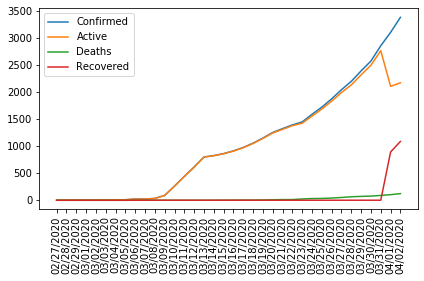

In [87]:
#2.1 Defining active cases as the column "Active"
df["Active"] = df["Confirmed"] - df["Deaths"] - df["Recovered"]

#2.2 Plotting the confirmed- and active cases plus the deaths and recovered in Denmark.
import matplotlib.pyplot as plt

ax = plt.figure().add_subplot(111)

ax.plot(df["Confirmed"], label = "Confirmed")
ax.plot(df["Active"], label = "Active")
ax.plot(df["Deaths"], label = "Deaths")
ax.plot(df["Recovered"], label = "Recovered")

plt.xticks(rotation='90')

plt.tight_layout()
ax.legend()
plt.show()

The number of active cases has been steadily climbing until recently when recovered cases started emerging in the data.

We define and plot the recovered- and the death ratio in Denmark over time.   
The death rate is equivalent to asking the question:   
"What are the chances of dying from Corona virus?"  
And opposite with the recovered rate:   
"What are the chances of surviving the Corona virus?"

,Confirmed,Deaths,Recovered,Active,Discharged,Recovered_ratio,Death_ratio
ObservationDate,,,,,,,
02/27/2020,1,0,0,1,0,0.000000,0.000000
02/28/2020,1,0,0,1,0,0.000000,0.000000
02/29/2020,3,0,0,3,0,0.000000,0.000000
03/01/2020,4,0,0,4,0,0.000000,0.000000
03/02/2020,4,0,0,4,0,0.000000,0.000000
03/03/2020,6,0,0,6,0,0.000000,0.000000
03/04/2020,10,0,0,10,0,0.000000,0.000000
03/05/2020,10,0,0,10,0,0.000000,0.000000
03/06/2020,23,0,1,22,1,100.000000,0.000000


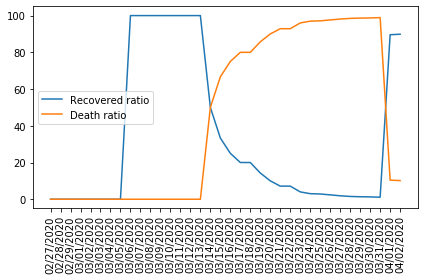

In [88]:
#3.1 Defining ended cases as "Discharged"
df["Discharged"] = df["Confirmed"] - df["Active"]
df["Recovered_ratio"] = df["Recovered"] * 100 / df["Discharged"]
df["Recovered_ratio"].fillna(0, inplace = True)

df["Death_ratio"] = df["Deaths"] * 100 / df["Discharged"]
df["Death_ratio"].fillna(0, inplace = True)

#3.2 Plotting the recovered- and death ratio over time
ax = plt.figure().add_subplot(111)

ax.plot(df["Recovered_ratio"], label = "Recovered ratio")
ax.plot(df["Death_ratio"], label = "Death ratio")


plt.xticks(rotation='90')

plt.tight_layout()
ax.legend()
#plt.show()
df

The recovered rate was 100% in a time interval at the beginning of March when only one person was recovered and none dead. The 13th of March we observe the first death and the death rate quickly climbs to 99% as per the 31th of March since still only one person is registered as recovered.  
The 1st of April there was a surge of registered recovered cases and the death rate plummets to 10% as the recovered rate shoots up to 90%.

We use the exponential growth function, $f(x)=a\cdot e^{b\cdot x}+c$, to fit the confirmed cases with scipy curve_fit. Scipy.optimize.curve_fit uses a non-linaer least squares to fit a function to data.   
The program finds the minimized distances from all points of the dataset. This is done by finding the best-fit parameters for $a$, $b$ and $c$ in $f(x)$ so that the sum of squared errors are minimized.

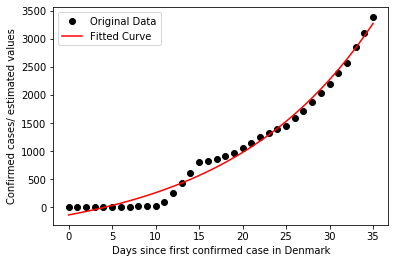

In [89]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

#3.1 Defining functional form for the growth of the confirmed cases
def growth_func(x, a, b, c):
  return a * np.exp(b * x) + c

#3.2 Defining variable Y: Confirmed cases
Y = df.Confirmed.values
#3.3 Defining variable X: Number of days from length of Y (Total days of Corona virus)
X = np.arange(0, len(Y))
#3.4 Using scipy.optimize.curve_fit to define best-fit parameters for a, b and c so that the sum of squared errors are minimized
popt, pcov = curve_fit(growth_func, X, Y)
#3.5 Defining the growth function with the optimal parameters. 
      #The star in *popt unpacks the popt array so the two optimized parameter values become the second and third arguments to the function.
def growth(x):
    return growth_func(x, *popt)

#3.6 Plotting the confirmed cases and the fitted values with days since first confirmed case on the first axis.
plt.figure()
plt.plot(X, Y, 'ko', label="Original Data")
plt.plot(X, growth(X), 'r-', label="Fitted Curve")
plt.legend()
plt.xlabel("Days since first confirmed case in Denmark")
plt.ylabel("Confirmed cases/ estimated values")
plt.show()

We see how the estimated values fit the data well using the optimized parameters.

We insert the optimized parameters into the inverse of the exponential growth function to find the number of days that it takes for the virus to infect the number of people that should be infected assuming that a death rate of 1.5% and an incubation time of 14 days.  
The inverse exponential growth function:
$ f(x) = a \cdot e^{b \cdot x}+c \Leftrightarrow
f(x)^{-1}  =   \frac{1}{b}ln\left(\frac{x-c}{a}\right) $

In [91]:
days_infected_before_outcome = 14 #Assuming it takes 14 days to get symptoms (incubation time)
assumed_real_death_rate = 1.5     #Assuming a death rate of 1.5%

#4.1 Defining the inverse exponential growth function
def create_inverse_growth_func(a, b, c):
    def inverse(x):
        return np.log((x - c) / a) / b
    return inverse
#4.1.1 Inserting the optimized parameters into the inverse growth function
inverse_growth = create_inverse_growth_func(*popt)

#4.2 Defining latest number of cases by using the assumed death rate
latest_number_of_deaths = df["Deaths"][-1] 
cases_days_infection_before = latest_number_of_deaths * 100 / assumed_real_death_rate
print(f'A total of {cases_days_infection_before:.1f} cases if assumed death rate is 1.5%.')

#4.3 Shift_days_1 equals the number of days before reaching 8200 cases 
#    using the parameters that optimize the fit of the original data
shift_days_1 = inverse_growth(cases_days_infection_before)
print(f'It takes {shift_days_1:.1f} days to reach 8.200 cases.')
print(f'Checking the resulat with the growth function: {growth(shift_days_1):.1f} cases within 48.8 days.')

A total of 8200.0 cases if assumed death rate is 1.5%.
It takes 48.8 days to reach 8.200 cases.
Checking the resulat with the growth function: 8200.0 cases within 48.8 days.


We take into account that it takes 14 days to get symptoms.  
This means that the first person to be infected must have been infected 14 days before the 28th of February.   
Thus, we subtract (36 total days of infection - 14 day incubation time =) 22 days from the days it takes to reach 8200 cases.  
In this way, we give the Corona virus a 14 days growth lead.

In [98]:
#4.4 Shift_days_2 equals the number of days before reaching 8200 cases taking into account that it takes 14 days to get symptoms.
shift_days_2 = shift_days_1 - (len(df) - days_infected_before_outcome)
print(f'It takes {shift_days_2:.1f} days to reach 8.200 cases if incubation time is 14 days.')
print(f'As the growth has a 14 days lead, the "real" number of cases is {growth(shift_days_2):.1f} cases on day 1.')

It takes 26.8 days to reach 8.200 cases if incubation time is 14 days.
As the growth has a 14 days lead, the "real" number of cases is 1771.4 cases on day 1.


We create the estimated "real" number of cases by letting 26.8 days (shift_days_2) be the inital day of the growth function, and insert the estimated "real" number of cases into the dataframe.

In [100]:
#4.5 Creating estimated "real" number of cases using shift_days_2 while inserting "real" into the dataframe
X = np.arange(0, len(df))
if "real" in df.columns:
    df.drop("real", axis=1, inplace=True)
df.insert(loc=len(df.columns),
          column="real",
          value=growth(X+shift_days_2).astype(np.int))

df

,Confirmed,Deaths,Recovered,Active,Discharged,Recovered_ratio,Death_ratio,real
ObservationDate,,,,,,,,
03/24/2020,1591,32,1,1558,33,3.030303,96.969697,10561
03/25/2020,1724,34,1,1689,35,2.857143,97.142857,11245
03/26/2020,1877,41,1,1835,42,2.380952,97.619048,11970
03/27/2020,2046,52,1,1993,53,1.886792,98.113208,12739
03/28/2020,2201,65,1,2135,66,1.515152,98.484848,13555
03/29/2020,2395,72,1,2322,73,1.369863,98.630137,14421
03/30/2020,2577,77,1,2499,78,1.282051,98.717949,15341
03/31/2020,2860,90,1,2769,91,1.098901,98.901099,16316
04/01/2020,3107,104,894,2109,998,89.579158,10.420842,17351


We plot the confirmed cases and the estimated cases with a 14 day growth lead.

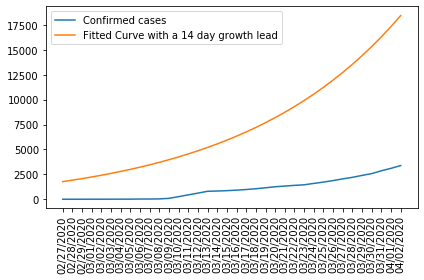

In [99]:
#4.6 Plotting the confirmed cases and the estimated cases with 14- and 26.8 days difference in initial growth time.
ax = plt.figure().add_subplot(111)

ax.plot(df["Confirmed"], label = "Confirmed cases")
ax.plot(df["real"], label = "Estimated real cases with a 14 day growth lead")


plt.xticks(rotation='90')

plt.tight_layout()
ax.legend()
plt.show()


##Conclusion 
We note that the estimated number of "real" cases is  18.449 by the 2nd of April compared to the 3.386 cases confirmed. This means that the number of underreported cases or the "dark" number is more than four times the size of the known figure!